In [193]:
import utils
import re
import string

import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, clear_output

# Day 5 Alchemical Reduction

Pairs of the same letters with different cases like `aA` react and destroy themselves. So first up, a func which takes in two letters and returns True if the react:

In [63]:
def reacts(x, y):
    """takes in two chars and returns True if they react, False otherwise"""
    if x.lower() == y.lower() and x != y:
        return True
    else:
        return False
    
reacts('a', 'A'), reacts('A', 'a'), reacts('a', 'b')

(True, True, False)

Now to go through a string of letters, reacting things once:

In [115]:
def react_once(s = "abBA", ans = ""):
    reacted = False
    length = len(s)

    for i, c in enumerate(s):
        if reacted:
            reacted = False
        else:
            if i + 1 < length:
                if reacts(c, s[i+1]):
                    reacted = True
                else:
                    ans += c
                    reacted = False
            else:
                if not reacted:
                    ans += c

    return ans

assert react_once("aA") == ""
assert react_once("abBA") == "aA"
assert react_once("abAB") == "abAB"
assert react_once("aabAAB") == "aabAAB"

So above I only do one pass, so here I keep doing passes until all reactions are reacted:

In [166]:
def react(s="abBA", ans=""):
    while s != react_once(s):
        s = react_once(s)
    return s    

assert react("abBA") == ""
assert react("dabAcCaCBAcCcaDA") == "dabCBAcaDA"

And finally, the input:

In [121]:
%%time
inp = utils.get_input(5).strip()
print("Original length: ", len(inp))
part_one = react(inp)
print("After reaction:  ", len(part_one))

Original length:  50000
After reaction:   10972
CPU times: user 4.56 s, sys: 1.64 ms, total: 4.56 s
Wall time: 4.56 s


# Part 2

What if we remove one polymer type totally before reacting the string, so it reacts more?

First up, figuing out to to remove chars:

In [165]:
s = "dabAcCaCBAcCcaDA"
c = "a"
assert re.sub(f"{c}|{c.upper()}", "", s) == "dbcCCBcCcD"

In [266]:
def plot(r=r):
    """plots a dict r of key label and value"""
    x, y = zip(*r.items())
    clear_output(wait=True)
    fig, ax = plt.subplots(figsize=(12,4))
    
    color = ['blue' for i in x]       # defalut color
    #highlight lowest:
    color[y.index(min(y))] = "green"  # highlight color

    ax.bar(x, y, color=color)
    ax.set_ylabel("Length")
    #ax.set_yscale('log')

    for i, v in enumerate(y):
        ax.text(i-0.22, v-500, str(v), color='white', fontsize=14, rotation="vertical")
    plt.title(f"Removing {x[y.index(min(y))]} leads to lowest length {min(y)}")
    
    plt.show()

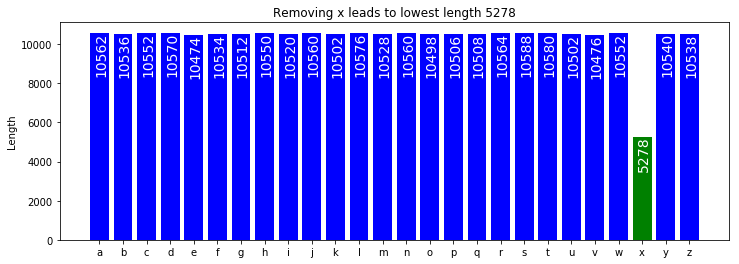

In [260]:
%%time

s = inp

r = {}
for c in string.ascii_lowercase:
    r[c] = len(react(re.sub(f"{c}|{c.upper()}", "", s)))
    plot(r)